In [1]:
from duneanalytics import DuneAnalytics
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath("/home/vincent/devel/vjuge/oc-iml/modules/P2"))
from module_P2_utils import removeOutliers, plotBoxes
# %run ../../P2/module_P2_utils.ipynb


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def query(_query: int):
    dune = DuneAnalytics('altacryptos', 'Password01#')
    dune.login()
    dune.fetch_auth_token()
    # fetch query result id using query id
    # query id for any query can be found from the url of the query:
    # for example:
    # https://dune.com/queries/4494/8769 => 4494
    # https://dune.com/queries/3705/7192 => 3705
    # https://dune.com/queries/3751/7276 => 3751
    result_id = dune.query_result_id(query_id=_query)
    data = dune.query_result(result_id)
    data_reduced = data.get('data').get('get_result_by_result_id')
    # json_object = json.dumps(data_reduced, indent = 4)
    df = pd.json_normalize(data_reduced, sep='_')
    df.drop('__typename', axis=1, inplace=True)
    df.reset_index(inplace=True)
    return df


In [3]:
from pandas import DataFrame
def post_process(df: DataFrame):
    df['data_amount'] = pd.to_numeric(df['data_amount'])
    df['data_amount'] = df['data_amount'] / 1e19
    df['data_evt_block_time'] = pd.to_datetime(df['data_evt_block_time'])
    # print(df.dtypes)
    return df

In [4]:
def save_csv(df, title="dataframe_export.csv"):
    df.to_csv(title+".csv", sep=';')

In [5]:
df_uniswap_tvl = pd.read_csv("uniswap.csv")

/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,24

In [6]:
df_uniswap_tvl.head(10)

,Unnamed: 0,Date,Timestamp,Uniswap,Uniswap.1,Uniswap.2,Uniswap.3,Uniswap.4,Uniswap.5,Uniswap.6,...,Uniswap.6566,Uniswap.6567,Uniswap.6568,Uniswap.6569,Uniswap.6570,Uniswap.6571,Uniswap.6572,Uniswap.6573,Uniswap.6574,Uniswap.6575
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,optimism,ethereum,polygon,celo,arbitrum,Total,optimism,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,TVL,TVL,Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USDT,...,PDX,QOM,DXP,BENT,SXDT,SQUAWK,NYM,CAW,KSEED,tether
4,NaN,03/11/2018,1.541203e+09,NaN,34684.037746670474,NaN,NaN,NaN,34684.037746670474,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,04/11/2018,1.541290e+09,NaN,41292.993048786346,NaN,NaN,NaN,41292.993048786346,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,05/11/2018,1.541376e+09,NaN,41550.309964509484,NaN,NaN,NaN,41550.309964509484,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,06/11/2018,1.541462e+09,NaN,43233.56007436587,NaN,NaN,NaN,43233.56007436587,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,07/11/2018,1.541549e+09,NaN,153862.56649807122,NaN,NaN,NaN,153862.56649807122,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,08/11/2018,1.541635e+09,NaN,180275.4550184856,NaN,NaN,NaN,180275.4550184856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_uniswap_tvl = df_uniswap_tvl[['Date', 'Timestamp', 'Uniswap.5']]
df_uniswap_tvl = df_uniswap_tvl.iloc[5:,:]
df_uniswap_tvl['Date'] = pd.to_datetime(df_uniswap_tvl['Date'])
df_uniswap_tvl['Timestamp'] = pd.to_numeric(df_uniswap_tvl['Timestamp'])
df_uniswap_tvl = df_uniswap_tvl.astype({
    'Uniswap.5' : 'double'
})

In [8]:
df_uniswap_tvl = df_uniswap_tvl.loc[df_uniswap_tvl['Timestamp'] > 1.595e9]

<AxesSubplot:xlabel='Timestamp'>

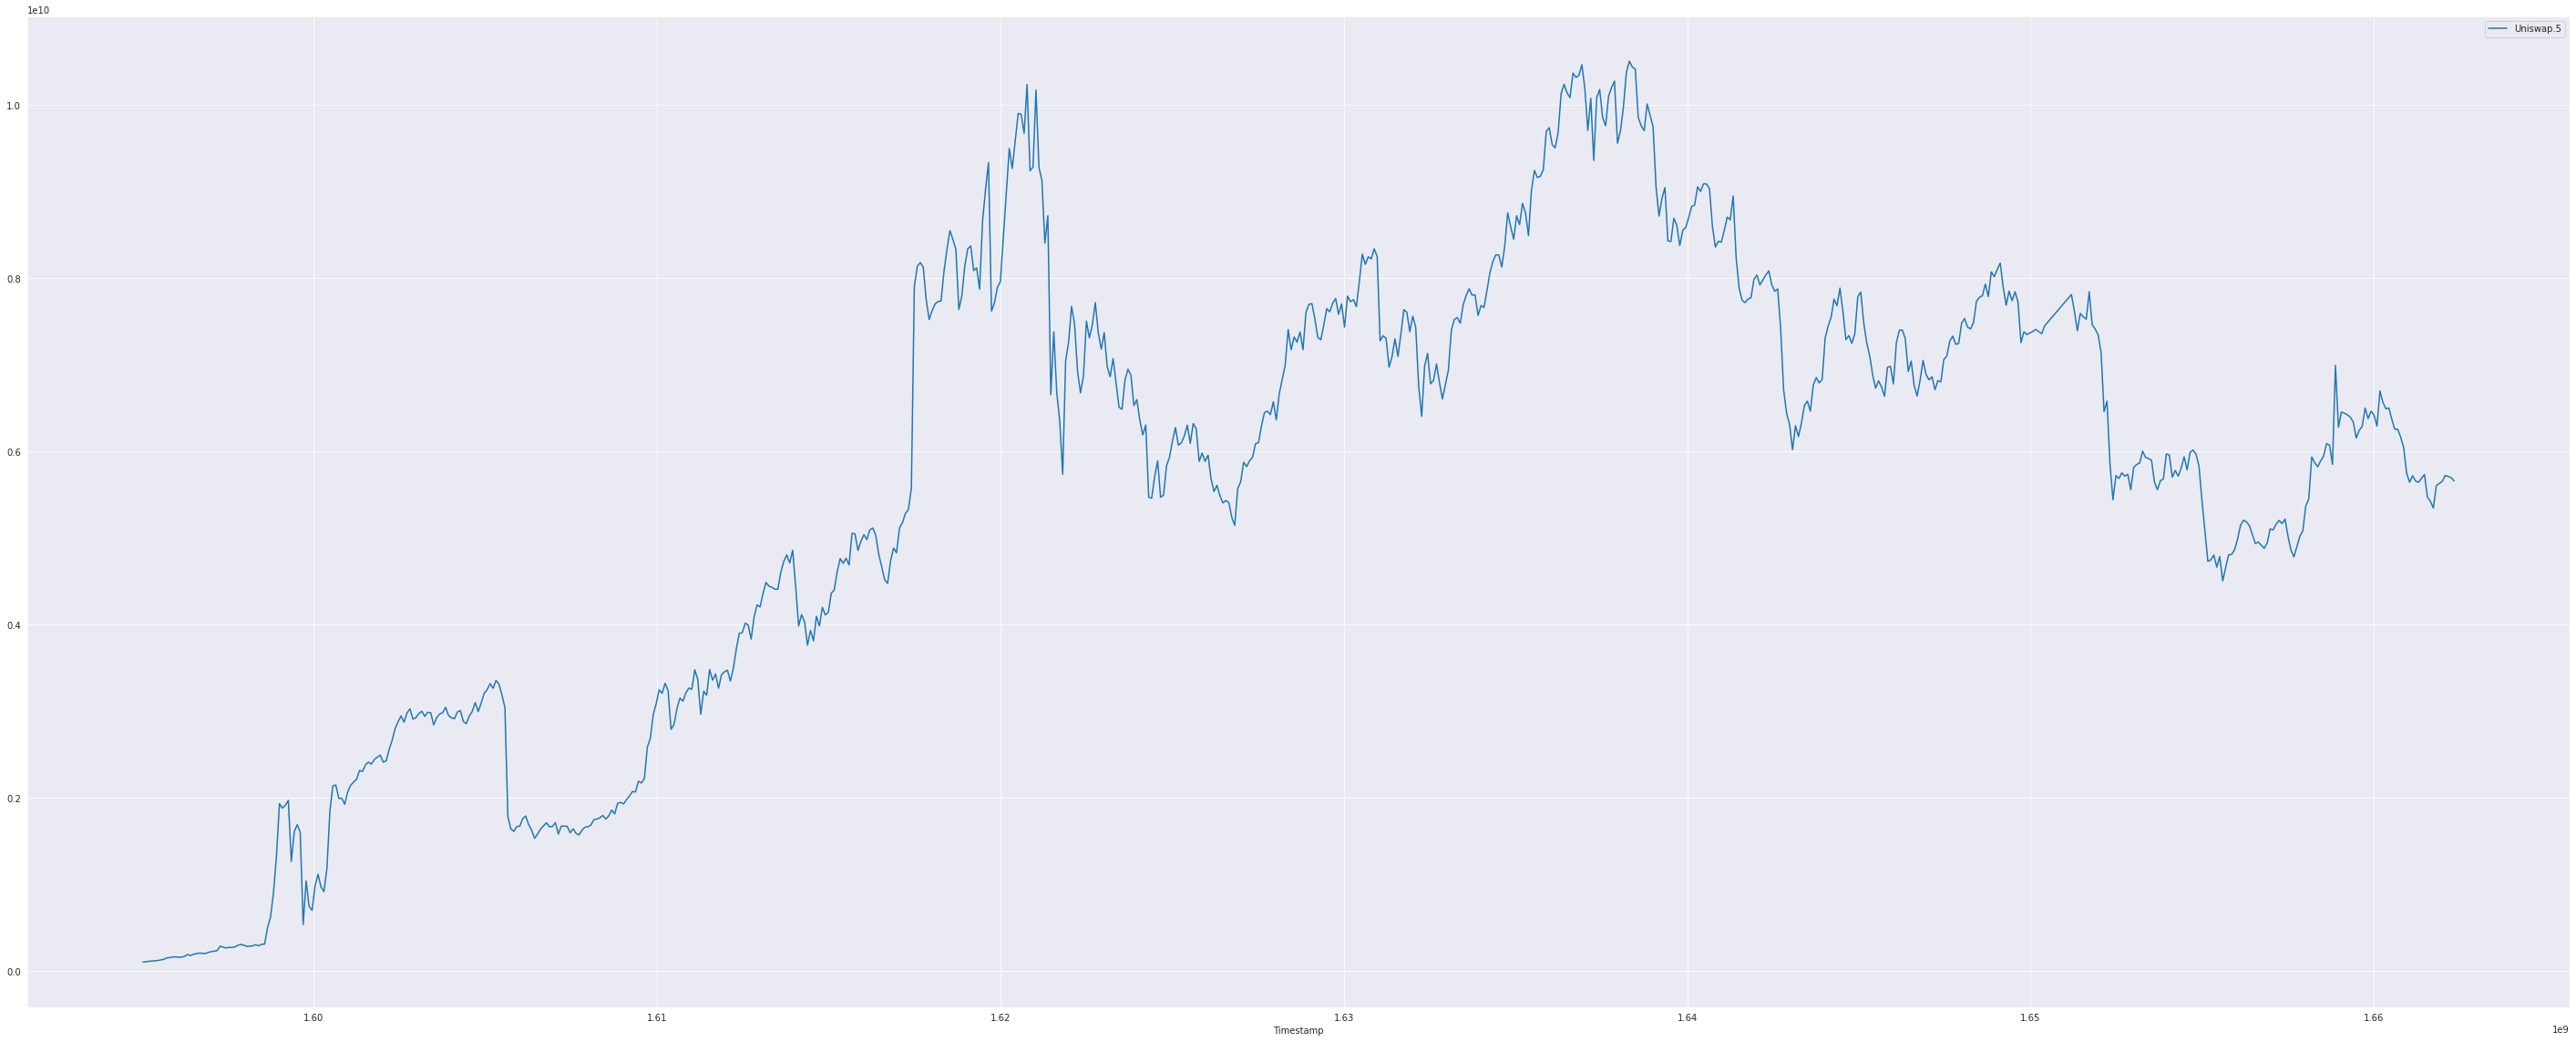

In [9]:
df_uniswap_tvl.plot(kind='line', x='Timestamp',  y='Uniswap.5',  figsize=(50, 20))



In [11]:
df_uniswap_tvl.shape

(762, 3)

In [ ]:
df_uniswap_tvl.dtypes

In [ ]:
df_uniswap_tvl['Month'] = df_uniswap_tvl['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
df_uniswap_tvl.set_index('Month')
df_uniswap_tvl = df_uniswap_tvl[['Month', 'Uniswap.5']]

In [ ]:
df_uniswap_tvl_mean = df_uniswap_tvl.groupby('Month', as_index=False).mean()

In [ ]:
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import seaborn as sns

f = Forecaster(y=df_uniswap_tvl_mean['Uniswap.5'], current_dates=df_uniswap_tvl_mean['Month'], freq='MS')
f

In [ ]:
sns.set(rc={'figure.figsize':(30,15)})

f.generate_future_dates(12) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

In [ ]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [ ]:
f.plot_acf()
# plt.show()

In [ ]:
f.plot_pacf()
plt.show()

In [ ]:
f.seasonal_decompose().plot()
plt.show()

In [ ]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

In [ ]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


In [ ]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

In [ ]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [ ]:
f.regr.summary()

Auto Arima approach

In [ ]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2,
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)